In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


diabetes_data = pd.read_csv("diabetes.csv")
# drop values with a "?" mark in it
breast_cancer_data = pd.read_csv("breast-w.csv", na_values="?")
breast_cancer_data = breast_cancer_data.dropna()


In [2]:
breast_cancer_data.head()


,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [3]:
diabetes_data.head()



,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
# X as the features and y as the data
X_bc = breast_cancer_data.drop('Class', axis = 1)
Y_bc = breast_cancer_data['Class']

X_db = diabetes_data.drop('class', axis = 1)
Y_db = diabetes_data['class']






In [5]:
# here test_size = 0.3 means 30% of the data is used for testing/validating and 70% for training 
train_X_bc, val_X_bc, train_Y_bc, val_Y_bc = train_test_split(X_bc, Y_bc, test_size=0.3)
train_X_db, val_X_db, train_Y_db, val_Y_db = train_test_split(X_db, Y_db, test_size=0.3)






In [6]:
# creating one and multi level model using DecisionTreeClassifier
breast_cancer_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
breast_cancer_model_multilvl = DecisionTreeClassifier(criterion = "entropy")
diabetes_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 1)
diabetes_model_multilvl = DecisionTreeClassifier(criterion = "entropy")




In [7]:
# fitting training data 
breast_cancer_model.fit(train_X_bc, train_Y_bc)
diabetes_model.fit(train_X_db, train_Y_db)






DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# printing the first values of our predicitons
print(breast_cancer_model.predict(val_X_bc.head()))
print(diabetes_model.predict(val_X_db.head()))






['benign' 'benign' 'malignant' 'benign' 'malignant']
['tested_positive' 'tested_negative' 'tested_negative' 'tested_negative'
 'tested_negative']


In [9]:
# One Level
# returns a list 
# cross reference describes the model quality
# for all the data 
cv_scoring_bc = cross_val_score(breast_cancer_model, X_bc, Y_bc, cv = 10)
print("Average for the one-level cross-validation for breast cancer: ")
print(np.mean(cv_scoring_bc))

cv_scoring_db = cross_val_score(diabetes_model, X_db, Y_db, cv = 10)
print("Average for the one-level cross-validation for diabetes: ")
print(np.mean(cv_scoring_db))


Average for the one-level cross-validation for breast cancer: 
0.9093124530798692
Average for the one-level cross-validation for diabetes: 
0.7149008885850991


In [10]:
#acc_rate_bc = breast_cancer_model.score(val_X_bc, val_Y_bc)
#print("Accuracy rate for breast cancer: ")
#print(acc_rate_bc)

#acc_rate_db = diabetes_model.score(val_X_db, val_Y_db)
#print("Accuracy rate for diabetes: ")
#print(acc_rate_db)


In [11]:
# fitting training data and predicting validation data
breast_cancer_model_multilvl.fit(train_X_bc, train_Y_bc)
diabetes_model_multilvl.fit(train_X_db, train_Y_db)

print(breast_cancer_model_multilvl.predict(val_X_bc.head()))
print(diabetes_model_multilvl.predict(val_X_db.head()))

['benign' 'benign' 'malignant' 'benign' 'malignant']
['tested_positive' 'tested_negative' 'tested_negative' 'tested_negative'
 'tested_negative']


In [12]:
#Multi-Level
cv_scoring_bc_multilvl = cross_val_score(breast_cancer_model_multilvl, X_bc, Y_bc, cv = 10)
print("Average for the multilevel cross-validation for breast cancer: ")
print(np.mean(cv_scoring_bc_multilvl))

cv_scoring_db_multilvl = cross_val_score(diabetes_model_multilvl, X_db, Y_db, cv = 10)
print("Average for the multilevel cross-validation for diabetes: ")
print(np.mean(cv_scoring_db_multilvl))


Average for the multilevel cross-validation for breast cancer: 
0.9430927205405197
Average for the multilevel cross-validation for diabetes: 
0.7030929596719071


In [13]:
#acc_rate_bc_multilvl = breast_cancer_model_multilvl.score(val_X_bc, val_Y_bc)
#print("Accuracy rate for breast cancer for the multilevel: ")
#print(acc_rate_bc_multilvl)
#acc_rate_db_multilvl = diabetes_model_multilvl.score(val_X_db, val_Y_db)
#print("Accuracy rate for diabetes for the multilevel: ")
#print(acc_rate_db_multilvl)



In [14]:
# breast cancer 
# whole step size not including 1-10, since we want to look at these values more specific
breast_cancer_stepsize = [50,150,250,350,450,550,650, len(breast_cancer_data)]
breast_cancer_step1= []
breast_cancer_step2 = []

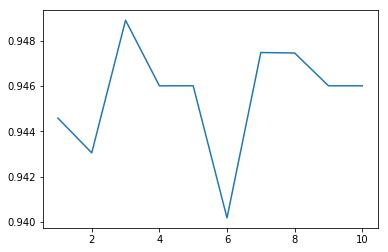

In [15]:
# now working with min_samples leaf (controlling over and underfitting)
for i in range(1,11):
    breast_cancer_model_multilvl = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=i)
    breast_cancer_model_multilvl.fit(train_X_bc, train_Y_bc)
    cv_scoring = cross_val_score(breast_cancer_model_multilvl, X_bc, Y_bc, cv = 10)
    scoring_mean = np.mean(cv_scoring)
    breast_cancer_step1.append(scoring_mean)
    
plt.plot(np.array([1,2,3,4,5,6,7,8,9,10]), np.array(breast_cancer_step1))

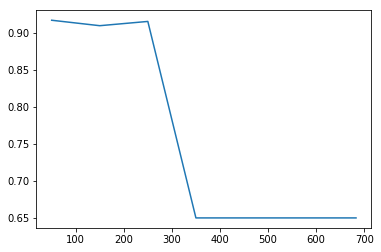

In [16]:
for i in breast_cancer_stepsize:
    breast_cancer_model_multilvl = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=i)
    breast_cancer_model_multilvl.fit(train_X_bc, train_Y_bc)
    cv_scoring = cross_val_score(breast_cancer_model_multilvl, X_bc, Y_bc, cv = 10)
    scoring_mean = np.mean(cv_scoring)
    breast_cancer_step2.append(scoring_mean)
    
    
plt.plot(breast_cancer_stepsize, breast_cancer_step2)

In [17]:
#diabetes 
diabetes_stepsize = [50,150,250,350,450,550,650, 700, len(diabetes_data)]
diabetes_step1 = []
diabetes_step2 = []

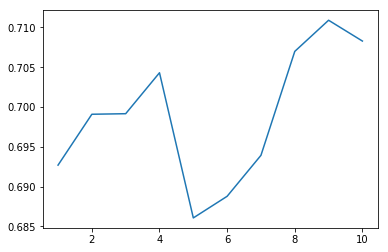

In [18]:
for i in range(1,11):
    diabetes_model_multilvl = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=i)
    diabetes_model_multilvl.fit(train_X_db, train_Y_db)
    cv_scoring = cross_val_score(diabetes_model_multilvl, X_db, Y_db, cv = 10)
    scoring_mean = np.mean(cv_scoring)
    diabetes_step1.append(scoring_mean)
    
plt.plot(np.array([1,2,3,4,5,6,7,8,9,10]), np.array(diabetes_step1))

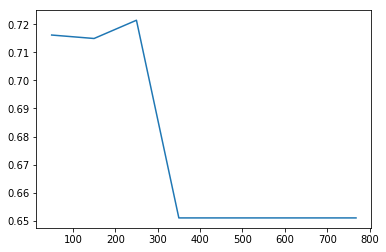

In [19]:
for i in diabetes_stepsize:
    diabetes_model_multilvl = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=i)
    diabetes_model_multilvl.fit(train_X_db, train_Y_db)
    cv_scoring = cross_val_score(diabetes_model_multilvl, X_db, Y_db, cv = 10)
    scoring_mean = np.mean(cv_scoring)
    diabetes_step2.append(scoring_mean)
    
plt.plot(diabetes_stepsize, np.array(diabetes_step2))